In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Centrality and variability by species
for species in iris.target_names:
    species_data = df_iris[df_iris['species'] == species]
    print(f"\nStatistics for {species}:")
    print("Mean:", species_data.drop(columns=['species']).mean()) 
    print("Median:", species_data.drop(columns=['species']).median())  
    print("Standard Deviation:", species_data.drop(columns=['species']).std())
    print("Range:", species_data.drop(columns=['species']).max() - species_data.drop(columns=['species']).min())




Statistics for setosa:
Mean: sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
dtype: float64
Median: sepal length (cm)    5.0
sepal width (cm)     3.4
petal length (cm)    1.5
petal width (cm)     0.2
dtype: float64
Standard Deviation: sepal length (cm)    0.352490
sepal width (cm)     0.379064
petal length (cm)    0.173664
petal width (cm)     0.105386
dtype: float64
Range: sepal length (cm)    1.5
sepal width (cm)     2.1
petal length (cm)    0.9
petal width (cm)     0.5
dtype: float64

Statistics for versicolor:
Mean: sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4.260
petal width (cm)     1.326
dtype: float64
Median: sepal length (cm)    5.90
sepal width (cm)     2.80
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64
Standard Deviation: sepal length (cm)    0.516171
sepal width (cm)     0.313798
petal length (cm)    0.469911
petal width (cm)     0.197753
dtype: float64
Range: s

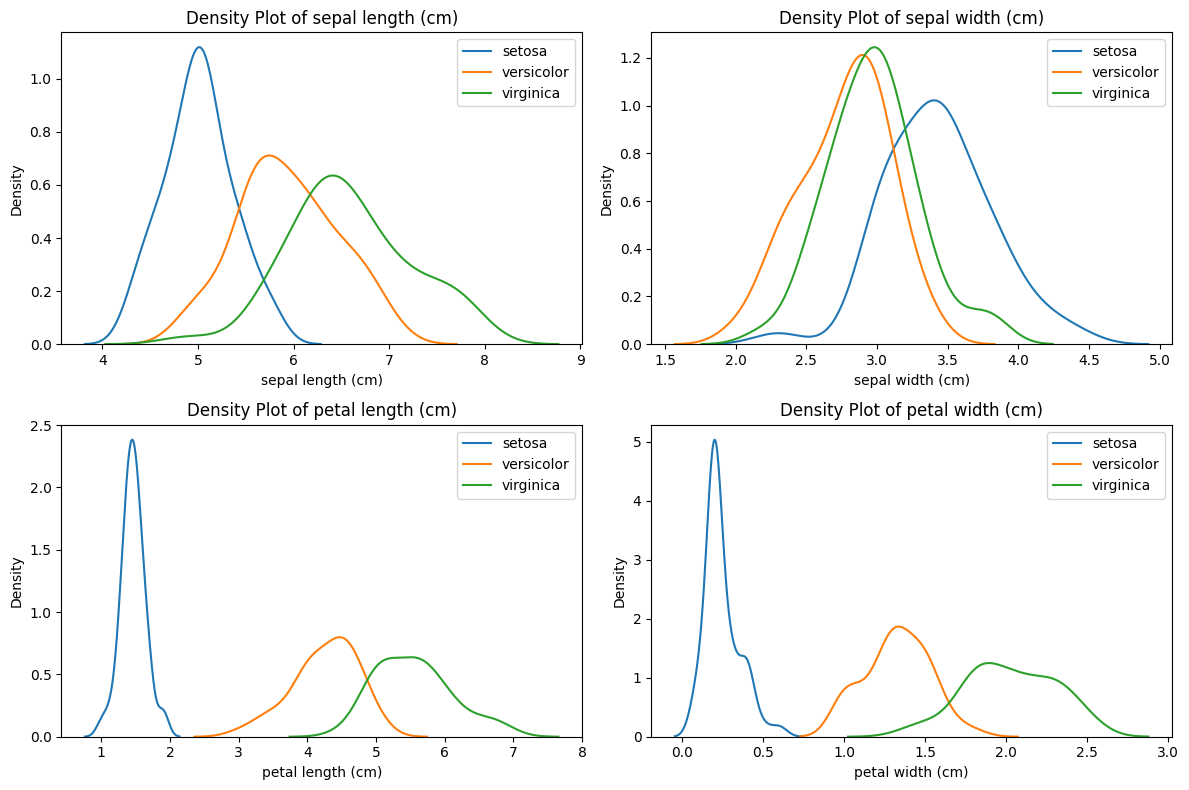

In [4]:
# Step 2: Enhanced Visualization

# Density plots with species comparison
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in iris.target_names:
        species_data = df_iris[df_iris['species'] == species][feature]
        sns.kdeplot(data=species_data, label=species)
    plt.title(f'Density Plot of {feature}')
    plt.legend()
plt.tight_layout()


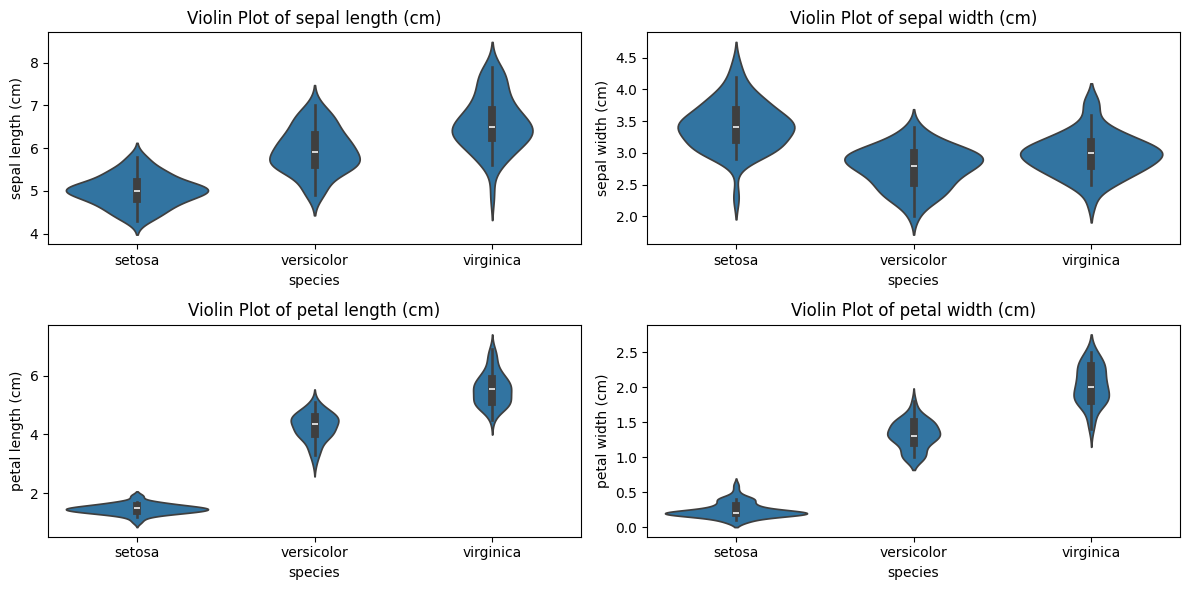

In [3]:

# Violin plots for distribution comparison
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=df_iris)
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()


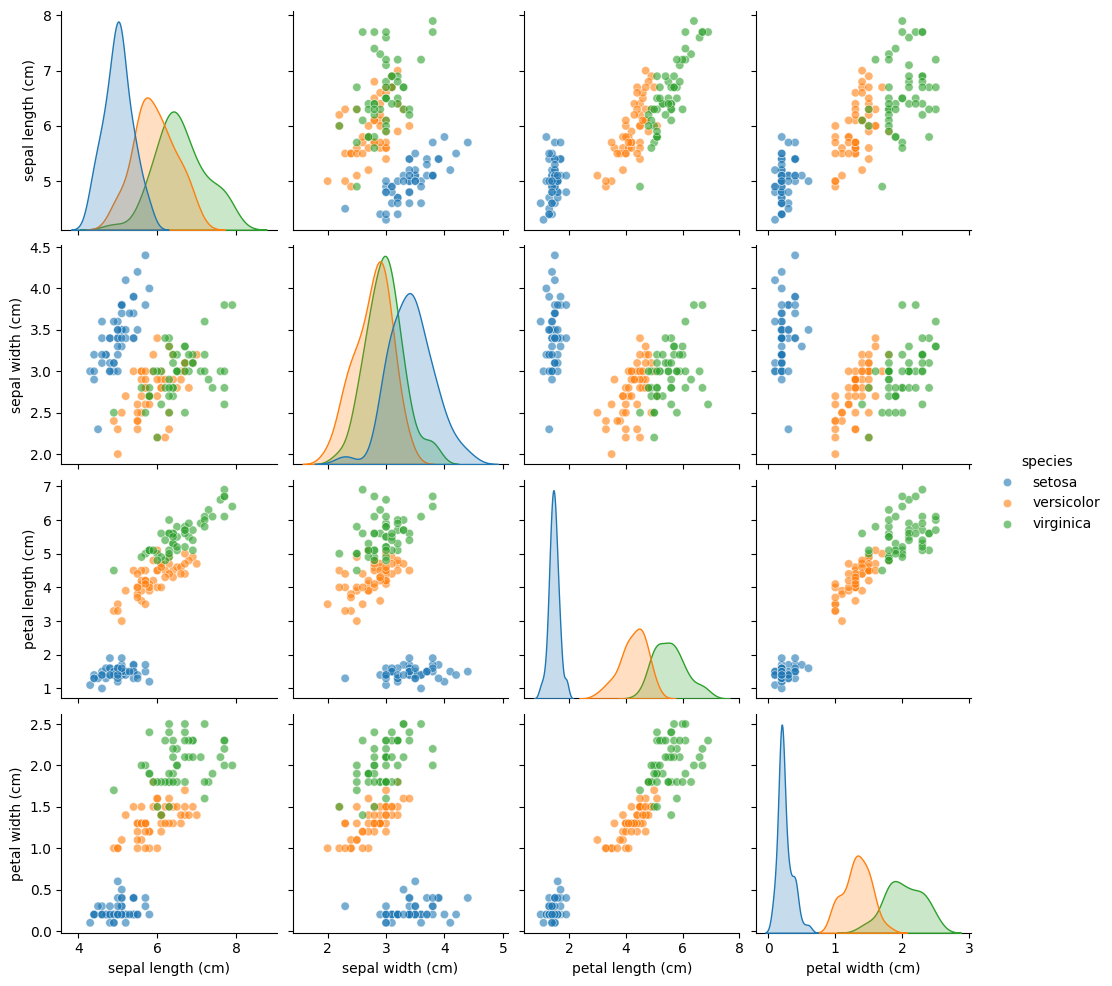

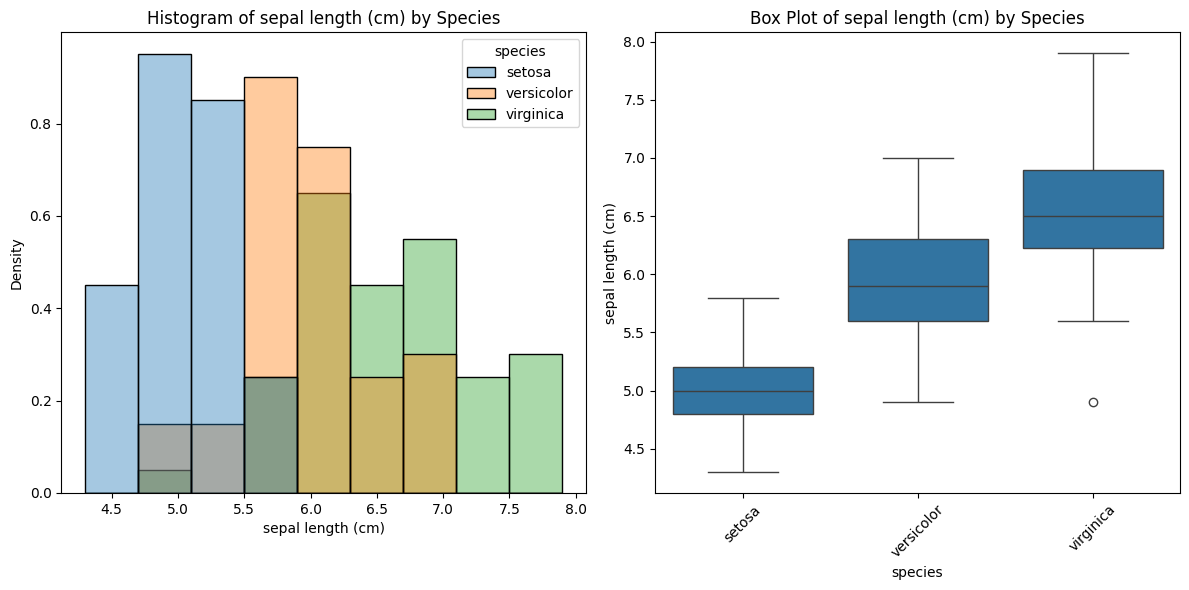

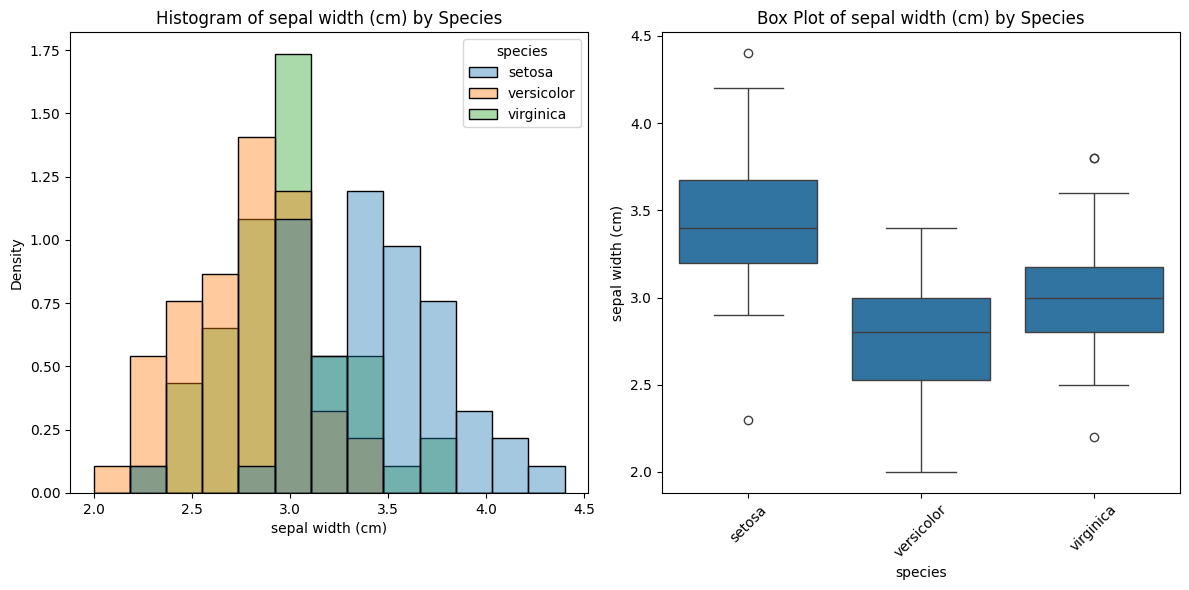

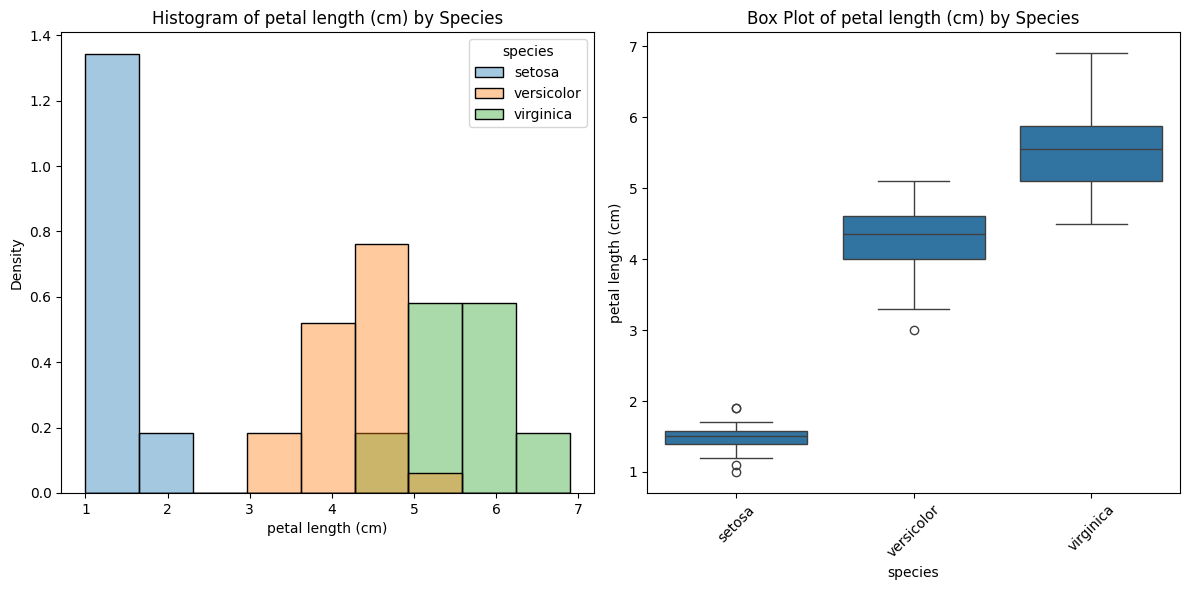

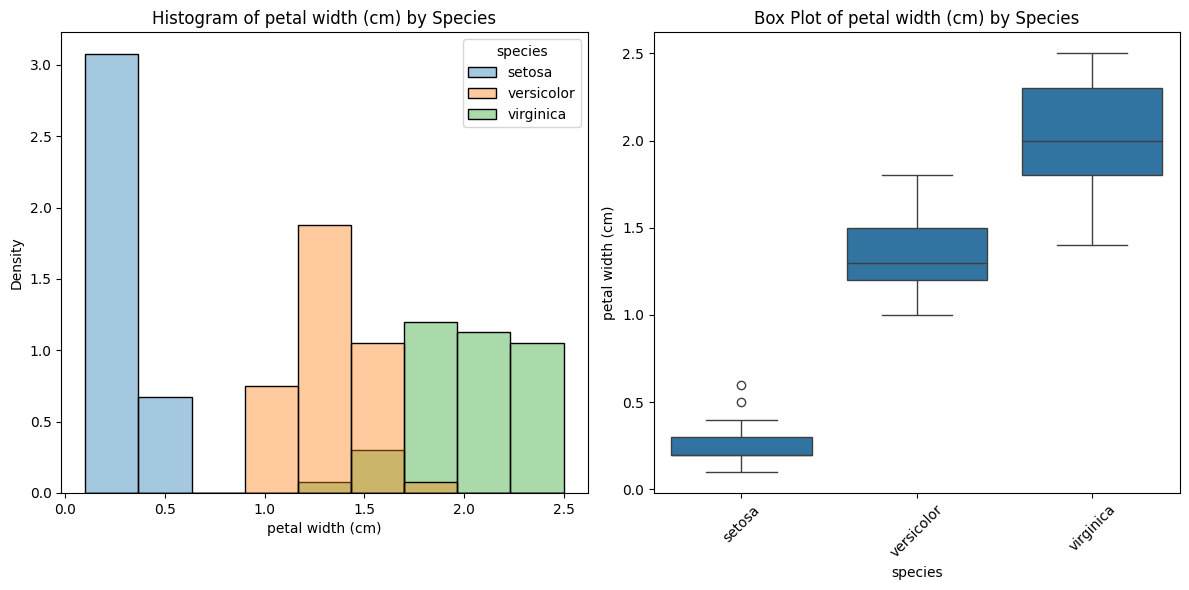

In [2]:

# Enhanced Pair Plot with Density
sns.pairplot(df_iris, hue='species', diag_kind='kde', plot_kws={'alpha': 0.6})

# Separate Feature Analysis
for feature in iris.feature_names:
    plt.figure(figsize=(12, 6))

    # Histogram with density overlay
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_iris, x=feature, hue='species', stat='density', common_norm=False, alpha=0.4)
    plt.title(f'Histogram of {feature} by Species')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_iris, x='species', y=feature)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot of {feature} by Species')

    plt.tight_layout()

plt.show()
